# <p><span style="color:blue">**FORECASTING COVID-19 WITH SIR MODEL AND REAL DATA **</span></p>

# <p><span style="color:green">**Inroduction **</span></p>
## **Dynamics of infectious diseases can be explained with SIR or SEIR models. The name of these models is come from their names of classes.**

#### <p><span style="color:red">**S --> Suspicious  **</span>: Individuals who have posibility of getting infected, but not infected currently.</p> 
#### <p><span style="color:red">**E --> Exposed  **</span>: Individuals who are infected but not infectious.</p>    
#### <p><span style="color:red">**I --> Infectios   **</span>: Individuals curently infected</p> 
#### <p><span style="color:red">**R --> Recovered  **</span>  : Individuals who were infected but not anymore (survived or died).</p>

## Here we will use SIR Model to forecast tranmission of new Coronavirus
___
<a href="https://sarkac.org/wp-content/uploads/2020/03/denklemler2.jpg" rel="sarkac.org"><img align="left" src="https://sarkac.org/wp-content/uploads/2020/03/denklemler2.jpg" alt="" /></a>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<br> <font color = "green" size="5">Beta --> </font> Average number of individuals that each individual touches per unit time <font color = "blue" size="4">X</font> probability of transmitting the disease <br>
<font color = "green" size="5">Gamma --> </font> 1 <font color = "blue" size="4">/</font> average duration of disease
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
___
## It is not possible to solve this equations with conventional ways. Thus, we will use some numeric methods to handle it. There is some code blocks at the bottom of the page to provide numerical solution to this differantial equations.
_________________________________
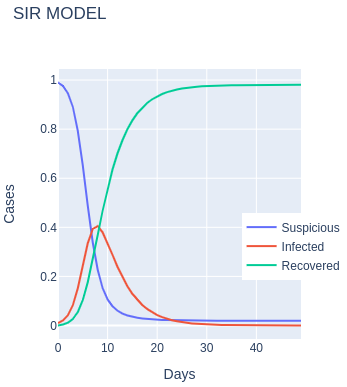

<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<br> Here is an example chart of SIR model with <font color = "green" size="2">Beta </font> = 1  and <font color = "green" size="2">Gamma</font> = 0.25.  <br>
<br>Initial values: s0 = 0.99 i0 = 0.01 and r0 =0 . <br>
<br> <br>
<br> <font color = "green" size="5">What if we increase beta and decrease gamma? </font> <br>
<p>&nbsp;</p>
<p>&nbsp;</p>
___
___
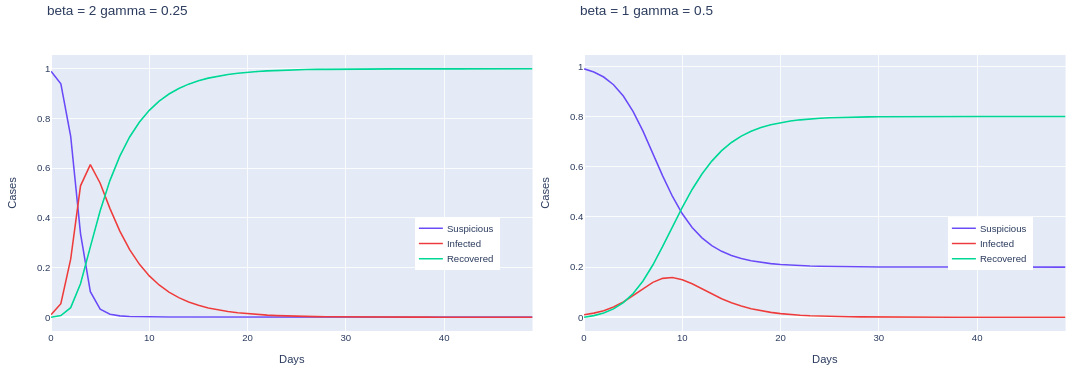
<br>If we increase beta, as shown in the charts, peak level of the infected cases will be greater. Also peak of the infected cases slides to left, as beta increases.<br>
<br>If we increase gamma value, it means that duration of the disease will be shortened, peak value of infected cases will decrease, which means curve will be more flatten. However, gama  value has small efect in sliding the peak to left or right.<br>
<br>There is also a fact that, if gamma > beta, then infected cases will be decreasing.
___

# <p><span style="color:green">Method </span></p>
___
## To forecast the spread of the Covid-19 we will use countries' coronavirus cases. We will try to make an estimation about parameters gamma and beta. However there ocurs some problems, when we try to do it for Covid-19. While other infectious diseases obey sir or seir models, Covid-19 data couldn't fit in a proper way. I think it is because of the Covid_19's high infectiousness and being asymptomatic %80 of the people.
## There is a sir model plot below for Turkey, its parameters gained from real data to make a good fit.

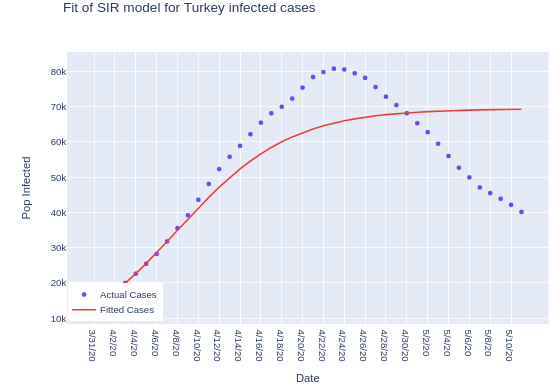
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
## <br> We tried to fit but results are frustrated. <br>
## <br> Thus, I tried to find peaked counteries' parameters with using their daily cases after peak. So, I estimate the value of beta and gamma after the peak. As one can know, beta is smaller than gamma after the peak. Below, there is a plot of daily gamma values of Turkey. I calculated these values with respect to sir model equations using real data.<br>
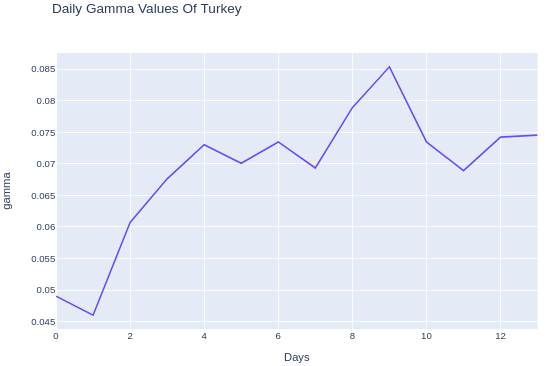
## <br> After calculating daily gamma values and averaging them. We use some python libraries to find best fitting beta values to real data. <br>
## <br> Also, these gama values tell us countries health system. In Turkey and Germany, gamma value is approximately 0.075, which means that the disease lasts 14 days on average. In Italy and Spain, however, gama is 0.04 approximately, which means the disease lasts 25 days on average. It is an indication of collapse of Spain and Italy's Health system for a while.


# <p><span style="color:green">Results</span></p>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
from scipy import integrate , optimize
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
warnings.filterwarnings("ignore")

confirmed_cases = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
confirmed_deaths = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv")
recovered = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv")

# TURKEY DATA
turkey_total_case = confirmed_cases[confirmed_cases["Country/Region"]=="Turkey"]
turkey_total_deaths = confirmed_deaths[confirmed_deaths["Country/Region"]=="Turkey"]
turkey_recovered = recovered[recovered["Country/Region"]=="Turkey"]

turkey_infected = (turkey_total_case.T["1/22/20":] - turkey_recovered.T["1/22/20":] - turkey_total_deaths.T["1/22/20":])
turkey_recovered_death =(turkey_recovered.T["3/11/20":] + turkey_total_deaths.T["3/11/20":])

turkey_index_1 = turkey_recovered_death.index[44:62]
turkey_index = turkey_recovered_death.index[:]

turkey_infected=turkey_infected[turkey_infected[213]>0].reset_index().drop("index",axis=1).rename(columns={213:"infected"})
turkey_recovered_death = turkey_recovered_death[turkey_recovered_death[213]>-1].reset_index().drop("index",axis=1).rename(columns={213:"rec"})

turkey = pd.DataFrame(data=[turkey_infected.infected,turkey_recovered_death.rec]).T
turkey_all = turkey.copy()
turkey = turkey.loc[44:61]

#GERMANY DATA
german_total_case = confirmed_cases[confirmed_cases["Country/Region"]=="Germany"]
german_total_deaths = confirmed_deaths[confirmed_deaths["Country/Region"]=="Germany"]
german_recovered = recovered[recovered["Country/Region"]=="Germany"]

german_infected = pd.DataFrame(german_total_case.T["1/22/20":][120] - german_recovered.T["1/22/20":][112] - german_total_deaths.T["1/22/20":][120])
german_recovered_death =pd.DataFrame(german_recovered.T["1/22/20":][112] + german_total_deaths.T["1/22/20":][120])

german_index_1 = german_recovered_death.index[81:111]
german_index = german_recovered_death.index[:]

german_infected=german_infected[german_infected[0]>-1].reset_index().drop("index",axis=1).rename(columns={0:"infected"})
german_recovered_death = german_recovered_death[german_recovered_death[0]>-1].reset_index().drop("index",axis=1).rename(columns={0:"rec"})

german = pd.DataFrame(data=[german_infected.infected,german_recovered_death.rec]).T
german_all = german.copy()
german = german.loc[81:110]

#SPAIN DATA
spain_total_case = confirmed_cases[confirmed_cases["Country/Region"]=="Spain"]
spain_total_deaths = confirmed_deaths[confirmed_deaths["Country/Region"]=="Spain"]
spain_recovered = recovered[recovered["Country/Region"]=="Spain"]

spain_infected = pd.DataFrame(spain_total_case.T["1/22/20":][201] - spain_recovered.T["1/22/20":][199] - spain_total_deaths.T["1/22/20":][201])
spain_recovered_death =pd.DataFrame(spain_recovered.T["1/22/20":][199] + spain_total_deaths.T["1/22/20":][201])

spain_index_1 = spain_recovered_death.index[93:111]
spain_index = spain_recovered_death.index[:]

spain_infected=spain_infected[spain_infected[0]>-1].reset_index().drop("index",axis=1).rename(columns={0:"infected"})
spain_recovered_death = spain_recovered_death[spain_recovered_death[0]>-1].reset_index().drop("index",axis=1).rename(columns={0:"rec"})

spain = pd.DataFrame(data=[spain_infected.infected,spain_recovered_death.rec]).T
spain_all = spain.copy()
spain = spain.loc[93:110]

#ITALY DATA
italy_total_case = confirmed_cases[confirmed_cases["Country/Region"]=="Italy"]
italy_total_deaths = confirmed_deaths[confirmed_deaths["Country/Region"]=="Italy"]
italy_recovered = recovered[recovered["Country/Region"]=="Italy"]

italy_infected = pd.DataFrame(italy_total_case.T["1/22/20":][137] - italy_recovered.T["1/22/20":][131] - italy_total_deaths.T["1/22/20":][137])
italy_recovered_death =pd.DataFrame(italy_recovered.T["1/22/20":][131] + italy_total_deaths.T["1/22/20":][137])

italy_index_1 = italy_recovered_death.index[98:111]
italy_index = italy_recovered_death.index[:]

italy_infected=italy_infected[italy_infected[0]>-1].reset_index().drop("index",axis=1).rename(columns={0:"infected"})
italy_recovered_death = italy_recovered_death[italy_recovered_death[0]>-1].reset_index().drop("index",axis=1).rename(columns={0:"rec"})

italy = pd.DataFrame(data=[italy_infected.infected,italy_recovered_death.rec]).T
italy_all = italy.copy()
italy = italy.loc[98:110]

In [ ]:
# GAMMAS 
#Turkey
req = turkey_recovered_death.loc[44:61]
req["derivative"] = req.rec-req.rec.shift(1)
req["gamma"] = req.shift(-1).derivative/turkey_infected.loc[44:61].infected
gammas = req[req.gamma<0.09].gamma
#gammas = req.loc[44:61].gamma
turkey_gamma = gammas.mean()
#German
req = german_recovered_death.loc[26:]
req["derivative"] = req.rec-req.rec.shift(1)
req["gamma"] = req.shift(-1).derivative/german_infected.loc[26:].infected
#gammas = req[(req.gamma>0.01) & (req.gamma<0.3) ].gamma
gammas = req.loc[81:110].gamma
german_gamma = gammas.mean()
#Spain
req = spain_recovered_death.loc[42:]
req["derivative"] = req.rec-req.rec.shift(1)
req["gamma"] = req.shift(-1).derivative/spain_infected.loc[42:].infected
gammas = req.loc[93:110].gamma
spain_gamma = gammas.mean()
#Italy
req = italy_recovered_death.loc[32:]
req["derivative"] = req.rec-req.rec.shift(1)
req["gamma"] = req.shift(-1).derivative/italy_infected.loc[32:].infected
gammas = req.loc[98:111].gamma
italy_gamma = gammas.mean()

# POPULATIONS
turkey_pop =  float(84000000)
german_pop = float(84000000)
spain_pop =  float(46000000)
italy_pop =  float(60000000)

In [ ]:
# BETA OPTIMIZATION
def model (country_df, country_name,country_index,population,country_gamma):
    y_inf = [i for i in country_df.infected]
    x_inf = country_df.index
    y_inf = np.array(y_inf, dtype=float)
    x_inf = np.array(x_inf, dtype=int)
    y_rec = [i for i in country_df.rec]
    x_rec = country_df.index
    y_rec = np.array(y_rec, dtype=float)
    x_rec = np.array(x_rec, dtype=int)

    N = population
    inf0 = y_inf[0]
    sus0 = N - inf0
    rec0 = y_rec[0]

    def sir_model(y, x, beta, gamma):
        s,i,r =y
        gamma = country_gamma
        dydt = [-beta *s*i/N +gamma * i,beta *s*i/N -gamma * i ,gamma * i]
        return dydt

    def fit_odeint(x, beta, gamma):
        return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

    popt, pcov = optimize.curve_fit(fit_odeint, x_inf, y_inf)
    fitted_i = fit_odeint(x_inf, *popt)

    fig = make_subplots(rows=1, cols=2)
    index = country_index[x_inf[0]:x_inf[len(x_inf)-1]+1]
    fig.append_trace(go.Scatter(x=index, y=y_inf,mode='markers',name= "Actual Cases"), row=1, col=1)
    fig.add_trace(go.Scatter(x=index, y=fitted_i, mode='lines',name='Fitted Cases'))
    
    title = "Fit of SIR model for "+ country_name +" infected cases \n" 
    title2 =  "Beta = "+ str(popt[0]) + " and Gamma = " + str(country_gamma)
    fig.update_layout(title = title ,xaxis_title='Date',yaxis_title='Pop Infected')
    fig.update_layout(legend=dict(x=0.001, y=0.01))
    fig.show()
    print(title2)
    return popt[0]

In [ ]:
spain_beta = model (spain,"Spain",spain_index,spain_pop,spain_gamma)
italy_beta = model (italy, "Italy",italy_index,italy_pop,italy_gamma)

In [ ]:
turkey_beta = model (turkey,"Turkey",turkey_index,turkey_pop,turkey_gamma)
german_beta = model(german," Germany",german_index,german_pop,german_gamma)

In [ ]:
def forecast(country_all, country_df,country_name,country_beta,country_gamma,country_index,counry_pop):
    y_inf = [i for i in country_df.infected]
    x_inf = country_df.index
    y_inf = np.array(y_inf, dtype=float)
    x_inf = np.array(x_inf, dtype=int)
    y_rec = [i for i in country_df.rec]
    x_rec = country_df.index
    y_rec = np.array(y_rec, dtype=float)
    x_rec = np.array(x_rec, dtype=int)

    N = counry_pop
    inf0 = y_inf[0]
    sus0 = N - inf0
    rec0 = y_rec[0]
    def sir_model(y, x):
        s,i,r =y

        beta = country_beta
        gamma = country_gamma
        dydt = [-beta *s*i/N +gamma * i,beta *s*i/N -gamma * i ,gamma * i]
        return dydt
    t = np.arange(0,250)    
    r =integrate.odeint(sir_model,(sus0, inf0, rec0),t)
   
    index = country_index[x_inf[0]:]
    fig = make_subplots(rows=1, cols=2)
    fig.append_trace(go.Scatter(x=country_index, y=country_all.infected,mode='markers',name= " Actual Active Cases"), row=1, col=1)
    fig.add_trace(go.Scatter(x=index, y=r[:,1], mode='lines',name='Forecasted Infected Cases'))
    #fig.show()
    #fig2 = make_subplots(rows=1, cols=2)
    fig.append_trace(go.Scatter(x=country_index, y=country_all.rec,mode='markers',name= "Actual Recovered Cases"), row=1, col=1)
    fig.add_trace(go.Scatter(x=index, y=r[:,2], mode='lines',name='Forecasted Recovered Cases'))
    title = " Actual and Forecasted Cases for Active and Recovered Class of " +country_name
    fig.update_layout(title = title ,xaxis_title='Date',yaxis_title='Cases')
    fig.update_layout(legend=dict(x=0.001, y=0.99))
   
    fig.show()
 

In [ ]:
forecast(spain_all,spain,"Spain",spain_beta,spain_gamma,spain_index,spain_pop)
forecast(italy_all,italy,"Italy",italy_beta,italy_gamma,italy_index,italy_pop)

In [ ]:
forecast(turkey_all,turkey,"Turkey",turkey_beta,turkey_gamma,turkey_index,turkey_pop)
forecast(german_all,german,"German",german_beta,german_gamma,german_index,german_pop)